<a href="https://colab.research.google.com/github/srijac9/Machine-Learning-and-Data-Visualization-Course/blob/main/2023_10_26_SrijaChitturi_Project74.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Univariate Classification II

 3. Logistic Regression - Decision Boundary

---

#### Getting Started:

1. Follow the next 3 steps to create a copy of this colab file and start working on the project.

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project74** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

Nowadays, social media advertising is one of the popular forms of advertising. Advertisers can utilise a user's demographic information and target their ads accordingly.

Build a Logistic Regression model to determine whether or not a user will purchase a particular product displayed on a social network ad by analysing the impact of the age of the user.



---

### List of Activities

**Activity 1:** Analyse the Dataset

  
**Activity 2:**  Normalise the Dataset

**Activity 3:**  Calculate the Sigmoid Output

**Activity 4:** Model Prediction

**Activity 5:** Model Evaluation

**Activity 6**: Experiment and Compare Performance With Some Threshold Values

---

#### Activity 1:  Analysing the Dataset



- Create a Pandas DataFrame for a **Social Network** dataset using the below link. This dataset consists of the following columns:

|Field|Description|
|---:|:---|
|UserID|Unique ID|
|Gender|Male or Female|
|Age|Age of a person|
|EstimatedSalary|Salary of a person|
|Purchased|‘0’ or ‘1’. ‘0’ means not purchased and ‘1’ means purchased.|


  **Source:** https://www.kaggle.com/rishabhsingh98/social-network-ads
  
  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv


- Print first five rows of the dataset.


In [ ]:
# Import the required modules and load the dataset
import pandas as pd
df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/social-network-ads.csv')

In [ ]:
# Print first five rows of the dataframe.
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Check for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Q:** Are there any missing values?

**A:** No

<ipython-input-5-31b54eab7d59>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True)


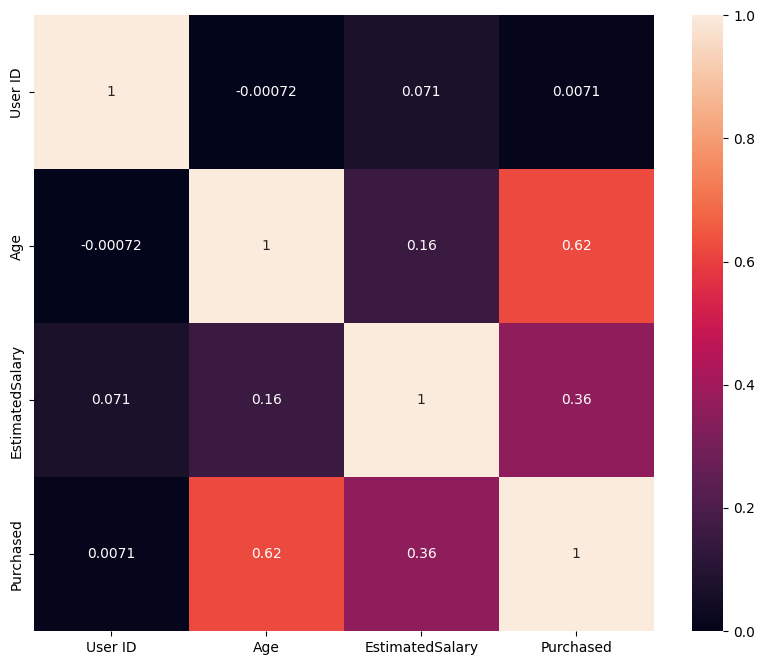

In [ ]:
# Create a heatmap to identify the relation between attributes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

**Q:** Which attribute(s) has the strongest relationship with the `Purchased` feature? Why?

**A:** Age, maybe because as the older you get the more use you have to items shown on social media, you don't need permission from others, and you have more financial freedom.

---

#### Activity 2:  Normalise the Dataset

 Perform the following tasks:

 - Get the descriptive statistics for the `Age` column.

 - Normalise the `Are` column values by calculating their $Z$-scores (or standard scaler).



count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64


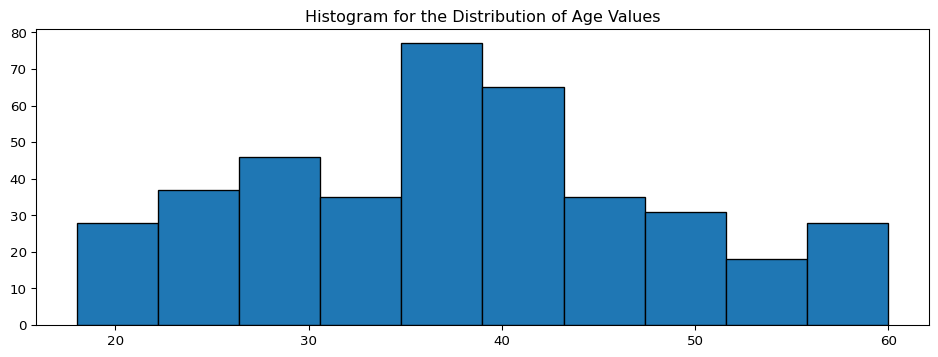

In [ ]:
# Get the descriptive statistics for the 'Age' column.
print(df['Age'].describe())

# Plot a histogram to show the distribution of values for the 'Age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the Distribution of Age Values")
plt.hist(df['Age'], bins = 'sturges', edgecolor = 'black')
plt.show()

Descriptive statistics for the normalised age values:
count    4.000000e+02
mean    -1.421085e-16
std      1.000000e+00
min     -1.874962e+00
25%     -7.540869e-01
50%     -6.248285e-02
75%      7.960601e-01
max      2.131571e+00
Name: Age, dtype: float64



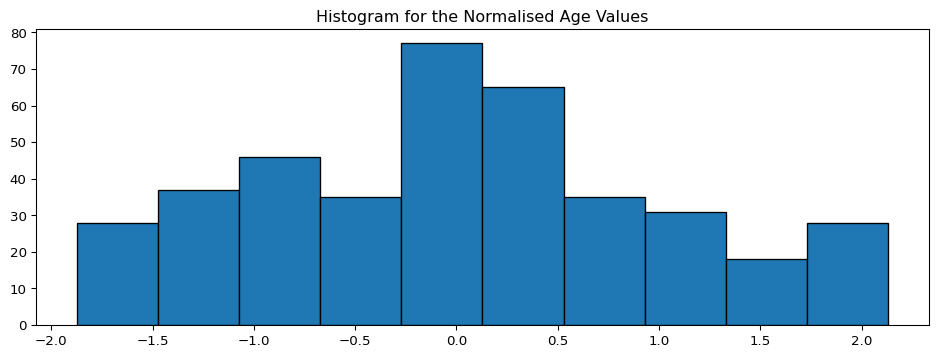

In [ ]:
# Normalise the 'Age' column values using the standard scaler method.

def standard_scaler(series):
  new_series = (series - series.mean()) / series.std()
  return new_series

Age_scaled = standard_scaler(df['Age'])

# Get the descriptive statistics for the normalised 'Age' column.
print(f"Descriptive statistics for the normalised age values:\n{Age_scaled.describe()}\n")

# Plot a histogram to show the distribution of values for the normalised 'age' column.
plt.figure(figsize = (12, 4), dpi = 96)
plt.title("Histogram for the Normalised Age Values")
plt.hist(Age_scaled, bins = 'sturges', edgecolor = 'black')
plt.show()

---

#### Activity 3:  Calculate the Sigmoid Output

1. Create a sigmoid function.

2.  Calculate the sigmoid output for the scaled (or Normalised) `Age` values.

In [ ]:
# Create a sigmoid() function using the above formula.
import numpy as np
def sigmoid(x):
  return pd.Series(1/(1+np.exp(-x)))

In [ ]:
# Calculate the sigmoid output for the scaled (or normalised) Age values.
scaled_age_sigmoid = sigmoid(Age_scaled)

# Get the descriptive statistics for the sigmoid output of the normalised 'Age'.
scaled_age_sigmoid.describe()

count    400.000000
mean       0.497031
std        0.212792
min        0.132969
25%        0.319999
50%        0.484384
75%        0.689131
max        0.893934
Name: Age, dtype: float64

---

#### Activity 4:  Model Prediction

Consider the threshold probability value of 0.5.

- Create a function that classifies the sigmoid output for the scaled  `Age` values into 0s and 1s using a threshold value of 0.5.


In [ ]:
# Create a function 'predict()' that takes the sigmoid output and the threshold
# and returns a Pandas series containing the predicted values (0s and 1s) as the output.
def predict(sigmoid_output,threshold):
  y_pred = [ 1 if output >= threshold else 0 for output in sigmoid_output]
  return y_pred

In [ ]:
# Use the 'predict()' function to classify the 'sigmoid()' function outputs as 0 and 1.
# Consider a threshold value of 0.5.
y_pred = np.array(predict(scaled_age_sigmoid, 0.5))
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,

---

#### Activity 5:  Model Evaluation

Evaluate the model by calculating the number of false positives and false negatives using a confusion matrix. Also, print the classification report for the predicted values.

In [ ]:
# Create a confusion matrix for the predicted values.
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(df['Purchased'],y_pred)

array([[181,  76],
       [ 29, 114]])

In [ ]:
# Print the classification report for the predicted values.
print(classification_report(df['Purchased'],y_pred))

              precision    recall  f1-score   support

           0       0.86      0.70      0.78       257
           1       0.60      0.80      0.68       143

    accuracy                           0.74       400
   macro avg       0.73      0.75      0.73       400
weighted avg       0.77      0.74      0.74       400



**Q** Write the count of f1-score for both the labels?

**A:** For 0: 0.78, For 1: 0.68

---

#### Activity 6: Experiment and Compare Performance With Some Threshold Values

---



Try threshold values =$[0.1,0.3,0.5,0.7,0.9]$ and compare their performance. Plot a graph to visualise.

[0.3575, 0.5675, 0.7375, 0.82, 0.6425]


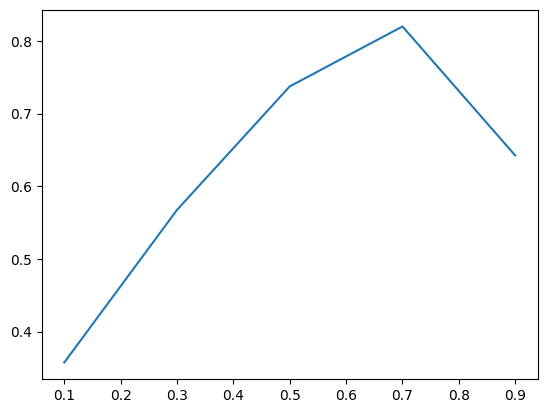

In [ ]:
thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
# Function to calculate accuracy, comparing actual target with predicted
def calc_accuracy(y_actual,y_pred):
  count = 0
  for i in range(0,len(y_actual)):
    if y_actual[i] == y_pred[i]:
      count = count+1
  return count / len(y_actual)

# Calculate accuracy and save it in the accuracy list
accuracy_list = []
for i in thresholds:
  y_predicted = predict(scaled_age_sigmoid,i)
  accuracy_list.append(calc_accuracy(df['Purchased'],y_predicted))
# Print the accuracy values
print(accuracy_list)
# Plot graph to visualise the accuracy for various thresholds
plt.plot(thresholds,accuracy_list)
# Function to show the plot
plt.show()

**Q:** What are your observations for change in accuracy with respect to threshold values? Why do you think this is the case?

**A:** As the threshold values increase from 0.1 to 0.7, the accuracy also increases. When the threshold value reaches from 0.7 to 0.9, the accuracy decreased.

**Reason**: With extreme high threshold values the sigmoid function becomes biased which is why the accuracy dropped.

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project74**) of the notebook will get copied.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project74** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>

---